In [1]:
# Import used packages
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
from scipy.integrate import solve_ivp
from scipy import optimize

In [2]:
# Declare global parameters
class ST_base():
    pass

ST = ST_base()
ST.S = 0
ST.E = 1
ST.I = 2
ST.R = 3

class ST_color():
    pass

STcolor = ST_color()
STcolor.S = 'palegreen'
STcolor.E = 'orchid'
STcolor.I = 'tomato'
STcolor.R = 'deepskyblue'

class PL_attributes():
    pass

PL = PL_attributes()
PL.edgeColor = 'grey'
PL.edgeAlpha = 0.4
PL.nodeSize = 80
PL.zoom = 5

In [3]:
def ODEsolveI(time, betaf):
    def ODE(time, y):
        Spos, Epos, Ipos, Rpos = y
        return [-betaf*Ipos*Spos/nodes, betaf*Ipos*Spos/nodes - delta*Epos, delta*Epos - gamma*Ipos, gamma*Ipos]
    return solve_ivp(ODE, (time[0], time[-1]), initialCondition, t_eval = time)['y'][ST.I]

<IPython.core.display.Javascript object>


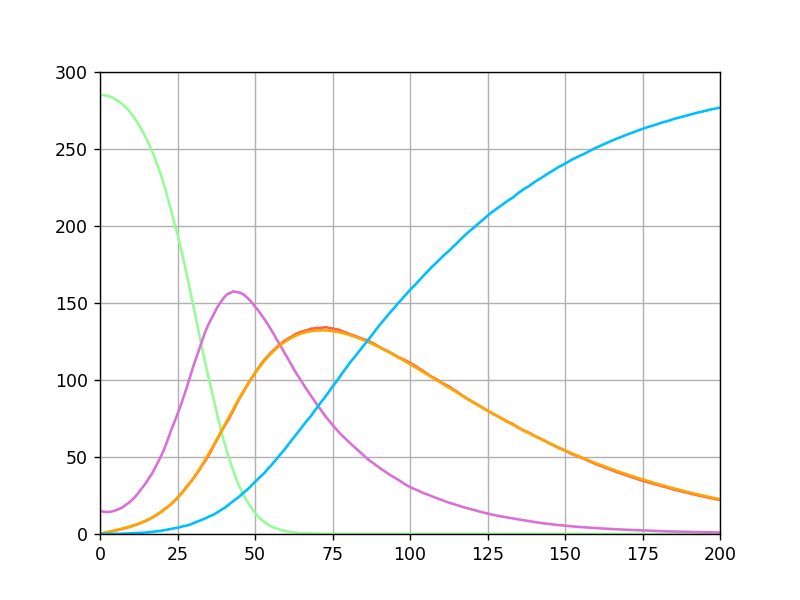

0.5423871975535461

0.5

array([[0.0008936]])

In [23]:
def ODEsolveI(time, betaf):
    def ODE(time, y):
        Spos, Epos, Ipos, Rpos = y
        return [-betaf*Ipos*Spos/nodes, betaf*Ipos*Spos/nodes - delta*Epos, delta*Epos - gamma*Ipos, gamma*Ipos]
    return solve_ivp(ODE, (time[0], time[-1]), initialCondition, t_eval = time)['y'][ST.I]

nodes = 300
a = 20

exposedPerc = 0.05
timesteps = 200
beta = 1/40
delta = 1/30
gamma = 1/50

time = np.arange(0, timesteps + 1 , 1)
initialCondition = [nodes*(1 - exposedPerc), nodes*exposedPerc, 0, 0]

statesListTot = [ [0 for j in range(timesteps + 1)] for i in range(4)]
for N in range(100):
    nodeStates = [[i for i in range(nodes)]] + [ [] for i in range(3)]
    statesList = [ [] for i in range(4)]
    while exposedPerc*nodes > len(nodeStates[ST.E]):
        randomN = random.randint(0, nodes - 1)
        if randomN not in nodeStates[ST.E]:
            nodeStates[ST.E].append(randomN)
            nodeStates[ST.S].remove(randomN)

    count = list(map(len, nodeStates))
    for i in range(4):
        statesList[i].append(count[i])
        
    for talla in range(timesteps):
        pairList = [ [i] for i in range(nodes)]
        nodeStatesNew = copy.deepcopy(nodeStates)
        for i in range(nodes):
            while len(pairList[i]) < a:
                randomN = random.randint(0, nodes - 1)
                if randomN not in pairList[i]:
                    pairList[i].append(randomN)
                    pairList[randomN].append(i)
                    
        for i in nodeStates[ST.I]:
            for j in pairList[i]:
                if j in nodeStatesNew[ST.S]:
                    randomp = np.random.uniform()
                    if randomp < beta:
                        if j in nodeStatesNew[ST.S]:
                            nodeStatesNew[ST.E].append(j)
                            nodeStatesNew[ST.S].remove(j)
                    
        for i in nodeStates[ST.E]:
            randomp = np.random.uniform()
            if randomp < delta:
                nodeStatesNew[ST.I].append(i)
                nodeStatesNew[ST.E].remove(i)
        for i in nodeStates[ST.I]:
            randomp = np.random.uniform()
            if randomp < gamma:
                nodeStatesNew[ST.R].append(i)
                nodeStatesNew[ST.I].remove(i)
        nodeStates = nodeStatesNew
        count = list(map(len, nodeStates))
        for i in range(4):
            statesList[i].append(count[i])
    for i in range(4):
        for j in range(timesteps + 1):
            statesListTot[i][j] += statesList[i][j]/100                  
            
parI, parICov = optimize.curve_fit(ODEsolveI, time, statesListTot[ST.I], p0= [beta*a], bounds = [0, 500])
    
fig = plt.figure()
plt.plot(time, statesListTot[ST.S], color= STcolor.S)
plt.plot(time, statesListTot[ST.E], color= STcolor.E)
plt.plot(time, statesListTot[ST.I], color= STcolor.I)
plt.plot(time, ODEsolveI(time, parI[0]), color= 'orange')
plt.plot(time, statesListTot[ST.R], color= STcolor.R)
plt.ylim(0, nodes)
plt.xlim(0, timesteps)
plt.grid()
plt.show()

display(parI[0])
display(beta*a)
display(np.sqrt(np.array(parICov)))

<IPython.core.display.Javascript object>


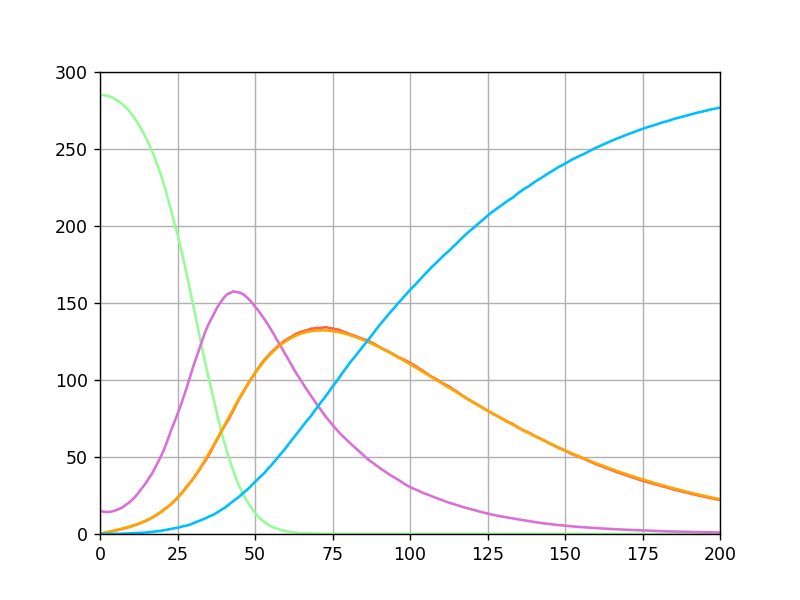

0.5423871975535461

0.5

array([[0.0008936]])

In [24]:
fig = plt.figure()
plt.plot(time, statesListTot[ST.S], color= STcolor.S)
plt.plot(time, statesListTot[ST.E], color= STcolor.E)
plt.plot(time, statesListTot[ST.I], color= STcolor.I)
plt.plot(time, ODEsolveI(time, parI[0]), color= 'orange')
plt.plot(time, statesListTot[ST.R], color= STcolor.R)
plt.ylim(0, nodes)
plt.xlim(0, timesteps)
plt.grid()
plt.show()

display(parI[0])
display(beta*a)
display(np.sqrt(np.array(parICov)))